In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

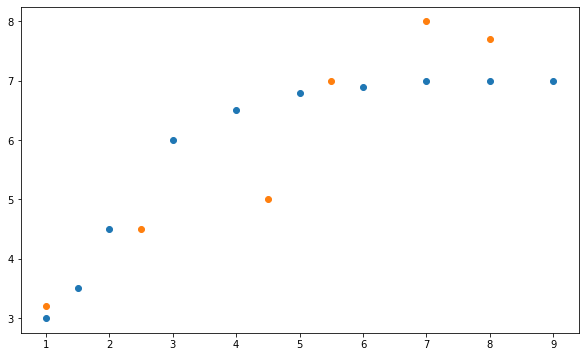

In [2]:
#create dataset
x_train = np.array([1, 1.5, 2, 3, 4, 5, 6, 7, 8, 9])
y_train = np.array([3, 3.5, 4.5, 6, 6.5, 6.8, 6.9, 7, 7, 7])

x_test = np.array([1, 2.5, 4.5, 5.5, 7, 8])
y_test = np.array([3.2, 4.5, 5, 7, 8, 7.7])

plt.figure(figsize=(10, 6))
plt.scatter(x_train,y_train)
plt.scatter(x_test,y_test)
plt.show()

In [3]:
x_train = x_train.reshape(-1,1) #convert into a column vector
x_test= x_test.reshape(-1,1) #convert into a column vector

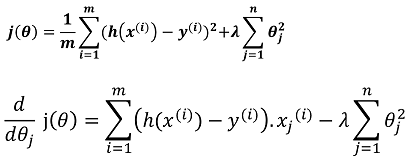

In [4]:
#Bulding a class for Polynomial Linear Regression Using Gradient Descent.
class PolyLinearRegression:
    
    def __init__(self, l_rate=0.001, iterations=10000, degree=2, lambda_value =0.2):  
        self.l_rate = l_rate  
        self.iterations = iterations  
        self.degree = degree  #degree of polynomial features
        self.lambda_value= lambda_value
    
    def scale(self, x):  #features scaling using z-score
        x_scaled = x - np.mean(x, axis=0)
        x_scaled = x_scaled / np.std(x_scaled, axis=0)
        return x_scaled
      
    def transformer(self, x ): #Transform data to polynomial features
        self.n = x.shape[0]  #number of training examples
        
        x_transformed = np.empty((self.n, 0))  #empty 2d-array
        
        for j in range( self.degree + 1 ) :
            if j != 0 :
                x_power = np.power( x, j )  #compute x to the power j
                x_transformed = np.append( x_transformed, x_power, axis = 1 ) #fill the aary with x_power as column vectors
        return x_transformed 

    def fit(self, x, y):  
        self.cost = []  
        self.theta = np.zeros((1 + self.degree)) # 1d array
        
        x = self.scale(x)  #preprocessing step 1
        x_p = self.transformer(x)  ##preprocessing step 2
        
        for i in range(self.iterations):
            y_pred = self.theta[0] + np.dot(x_p, self.theta[1:])
            l2 = self.lambda_value * np.sum(np.square(self.theta[1:]))
            mse = (1/self.n) * np.sum((y_pred - y)**2)+l2  
            self.cost.append(mse)  
            
            #Derivatives
            d_theta1 = (2/self.n) * np.dot(x_p.T, (y_pred - y)) - l2
            d_theta0 = (2/self.n) * np.sum(y_pred - y)
            
            #Values update
            self.theta[1:] = self.theta[1:] - self.l_rate * d_theta1
            self.theta[0] = self.theta[0] - self.l_rate * d_theta0                       
        return self
    
    
    def predict(self, x):  
        
        x = self.scale(x)  #preprocessing step 1
        x_p = self.transformer(x)  #preprocessing step 2
        
        return self.theta[0] + np.dot(x_p, self.theta[1:])
    

In [5]:
plr = PolyLinearRegression()  # creating object lr using the class PolyLinearRegression()
plr.fit(x_train, y_train)  #call the method fitGD()

# show  thetas
plr.theta

array([ 6.29982622,  1.65395136, -0.48209541])

In [6]:
#predict the training examples
y_pred_train_poly = plr.predict(x_train)
y_pred_test_poly = plr.predict(x_test)

#evaluate the learning model using training data
mse_train = (1/x_train.shape[0]) * np.sum((y_pred_train_poly - y_train)**2)
rmse_train = np.sqrt(mse_train)

#evaluate the learning model using testing data
mse_test = (1/x_test.shape[0]) * np.sum((y_pred_test_poly - y_test)**2)
rmse_test = np.sqrt(mse_test)

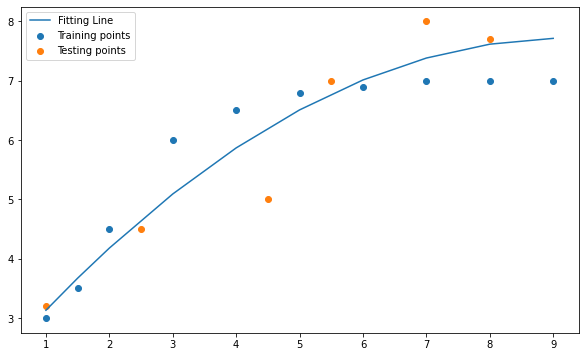

RMSE Train =  0.5012617237954055
RMSE Test =  0.5841235962969943


In [7]:
#Plot the results:
plt.figure(figsize=(10, 6))
plt.scatter(x_train, y_train, label='Training points')
plt.scatter(x_test, y_test, label='Testing points')
plt.plot(x_train, y_pred_train_poly, label='Fitting Line')
plt.legend(loc='upper left')
plt.show()
print ("RMSE Train = ", rmse_train)
print ("RMSE Test = ", rmse_test)